# The Battle of Neighborhoods by Ankur Gosar
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project we will create a recommender system for alternate restaurants in **Mumbai, Maharashtra, India**. 
The target audience of this project will be any food delivery apps like **Zomato, UberEats, FoodPanda, Swiggy** or restaurant table reservation apps like **EazyDiner, Zomato, etc.**

The aim of this project is to provide a user with a alternate restaurant options based on the target restaurant of the user when the target restaurant is not delivering at this time or there is no reservation available when they are using any of the above apps for food delivery or table reservation.

We will use our data science powers to generate a relevant recommendation to the user based on the target restaurant, distance from there, pricing, type of cuisine and average user rating. The smarter the recommendations are the more pleasant the experience will be for the user of the website or application.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* distance to target restaurant in the neighborhood
* type of cuisine, picing and average user rating

Following data sources will be needed to extract/generate the required information:
* number of restaurants and their location in every neighborhood will be obtained using **Foursquare API**
* type of cusine, pricing and average user rating will be obtained using venues feature of **Foursquare API**

### Download and Explore Dataset

In [1]:
import requests
import pandas as pd
import numpy as np

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [2]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  24.61 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  37.93 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.66 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.32 MB/s
vincent-0.4.4- 100% |###################

#### Use geopy library to get the latitude and longitude values of Mumbai.

In [3]:
address = 'Mumbai, Maharashtra'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
mumbai_latitude = location.latitude
mumbai_longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(mumbai_latitude, mumbai_longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


Next, we are going to start utilizing the Foursquare API to explore the restaurants and segment them.

In [4]:
CLIENT_ID = 'BR1FGJVA3URLYMRVFQ5RDPIZWYHNDIHTLGI3FKSTO5SD2EP2' # your Foursquare ID
CLIENT_SECRET = 'JJBBC40R13EXE0YAPJM0WXIOHAC41RM1FEMEUPMC2WG1I2TI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BR1FGJVA3URLYMRVFQ5RDPIZWYHNDIHTLGI3FKSTO5SD2EP2
CLIENT_SECRET:JJBBC40R13EXE0YAPJM0WXIOHAC41RM1FEMEUPMC2WG1I2TI


#### Now, let's get the venues that are in Mumbai within a radius of 3000 meters. (Unfortunately the FourSquare free account will return at most 100)

In [9]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    mumbai_latitude, 
    mumbai_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BR1FGJVA3URLYMRVFQ5RDPIZWYHNDIHTLGI3FKSTO5SD2EP2&client_secret=JJBBC40R13EXE0YAPJM0WXIOHAC41RM1FEMEUPMC2WG1I2TI&v=20180605&ll=18.9387711,72.8353355&radius=3000&limit=1000'

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9c6221f594df6afa8a99b0'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4caa0096d971b1f7ccca23e1-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d145941735',
         'name': 'Chinese Restaurant',
         'pluralName': 'Chinese Restaurants',
         'primary': True,
         'shortName': 'Chinese'}],
       'id': '4caa0096d971b1f7ccca23e1',
       'location': {'address': 'Waudby Road',
        'cc': 'IN',
        'city': 'Mumbai',
        'country': 'India',
        'distance': 253,
        'formattedAddress': ['Waudby Road', 'Mumbai', 'Mahārāshtra', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 18.938715239156295,
          'ln

#### Create DataFrame from JSON Output of the API call

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng
0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933
1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959
2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183
3,5263e1ba11d265711e8024bf,Town House Cafe,Bar,18.938550,72.833464
4,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on restaurants located within a radius of 3km from the centre of Mumbai city. We are doing this because we will get only 100 nearby venues and if we want details of those venues, we will get only 50 with a free FourSquare account.

In first step we have collected the required data: location, name and type (category) of every nearby venue within 3km from Mumbai center. But we do not need all the venues as we are looking only for restaurants or food places.

Second step in our analysis will be filtering out restaurants/food places and getting the venue details like tipCount, visitsCount, tier and rating for each of the filtered out venues. We will then modify the dataframe with one hot encoding for categories and make it ready for k-means clustering.

In third and final step we will focus on clustering the venues using k-means and then giving alternative recommendation based on the cluster and distance from target restaurant. The clustering algorithm used will be K-Means because:
* It is Easy to implement
* With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small).
* K-Means may produce higher clusters than hierarchical clustering

K-Means requires the number of clusters predefined. Elbow method gives us an idea on what a good 𝑘 number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids. We pick 𝑘 at the spot where SSE starts to flatten out and forming an elbow. We'll use the geyser dataset and evaluate SSE for different values of 𝑘 and see where the curve might form an elbow and flatten out.

## Analysis <a name="analysis"></a>

And how many venues were returned by Foursquare?

In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Filter Restaurants from the nearby Venues

In [14]:
# What are the restaurant-related categories?
nearby_venues.categories.unique()

array(['Chinese Restaurant', 'Coffee Shop', 'Parsi Restaurant', 'Bar',
       'Café', 'Bakery', 'Cricket Ground', 'Train Station',
       'Indian Restaurant', 'Seafood Restaurant', 'Scenic Lookout',
       'Ice Cream Shop', 'Art Gallery', 'History Museum', 'Multiplex',
       'Food Truck', 'Boutique', 'Breakfast Spot', 'Park', 'Beach',
       'Clothing Store', 'Gym / Fitness Center', 'Lounge', 'Market',
       'Pizza Place', 'Asian Restaurant', 'Dessert Shop',
       'Monument / Landmark', 'Hotel', 'Pub', 'Athletics & Sports',
       'Bookstore', 'Fast Food Restaurant', 'Diner', 'Gift Shop',
       'Deli / Bodega', 'Nightclub', 'Middle Eastern Restaurant',
       'New American Restaurant', 'Cheese Shop', 'Flea Market',
       'Italian Restaurant', 'Japanese Restaurant', 'Field', 'Gastropub',
       'College Academic Building', 'Stadium', 'Performing Arts Venue',
       'General Entertainment', 'Falafel Restaurant',
       'Vegetarian / Vegan Restaurant', 'Cocktail Bar', 'Theater',
    

Related categories have the words: _**'Restaurant', 'Pizza', 'Food', 'Dessert', 'Café', 'Coffee Shop' and 'Ice Cream'**_

In [15]:
#We will filter out restaurants from the nearby venues
mumbai_restaurants = nearby_venues[nearby_venues['categories'].str.contains('Restaurant' ) | nearby_venues['categories'].str.contains('Pizza' ) | nearby_venues['categories'].str.contains('Food') | nearby_venues['categories'].str.contains('Café') | nearby_venues['categories'].str.contains('Coffee') | nearby_venues['categories'].str.contains('Ice Cream')| nearby_venues['categories'].str.contains('Dessert')].reset_index(drop=True)
mumbai_restaurants

,id,name,categories,lat,lng
0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933
1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959
2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183
3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667
4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853
5,4c714f4fd7fab1f715d760c9,Cafe Excelsior,Café,18.937701,72.833566
6,4b0587d5f964a52078a322e3,Trishna,Seafood Restaurant,18.928619,72.832356
7,4b0587cef964a52081a222e3,Kyani & Co.,Café,18.944062,72.828576
8,4dc777edcc3ff3b304696c5a,Pratap Lunch Home,Seafood Restaurant,18.933605,72.832854
9,4ba9e19cf964a520ee3b3ae3,Natural's Ice Cream Parlour,Ice Cream Shop,18.934892,72.824222


Saving intermediate results to file to save API calls

In [16]:
#Saving DataFrame to CSV
mumbai_restaurants.to_csv("mumbai_restaurants.csv")
#Reading back from CSV
mumbai_restaurants = pd.read_csv("mumbai_restaurants.csv")

mumbai_restaurants.head()

,Unnamed: 0,id,name,categories,lat,lng
0,0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933
1,1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959
2,2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183
3,3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667
4,4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853


In [17]:
#Subroutine to get the venue details based on the venue_id
def getVenuesDetails(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
        venue_id,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION)
    
    result = requests.get(url).json()
    return result

In [18]:
#Subroutine to get the attributes like tipcout, visitscount, priceTier and rating of a particular venue
def getAttributes(_result):
    stats = _result['response']['venue']['stats']
    cost = _result['response']['venue']

    if ('tipCount' in stats):
        tipCount = stats['tipCount']
    else:
        tipCount = 0
    
    if ('visitsCount' in stats):
        visitsCount = stats['visitsCount']
    else:
        visitsCount = 0
    if ('price' in cost):
        priceTier = cost['price']['tier']
    else:
        priceTier = 0
    
    rating = _result['response']['venue']['rating']

    return tipCount, visitsCount, priceTier, rating

In [19]:
details = getVenuesDetails('5132207de4b01ac3b34d884f')
details
#tipCount, visitsCount, priceTier,rating = getAttributes(details)
#priceTier

{'meta': {'code': 200, 'requestId': '5c9c6222351e3d4c7ad90165'},
 'response': {'venue': {'allowMenuUrlEdit': True,
   'attributes': {'groups': [{'count': 1,
      'items': [{'displayName': 'Price',
        'displayValue': '₹₹',
        'priceTier': 2}],
      'name': 'Price',
      'summary': '₹₹',
      'type': 'price'},
     {'count': 3,
      'items': [{'displayName': 'Reservations', 'displayValue': 'Yes'}],
      'name': 'Reservations',
      'summary': 'Reservations',
      'type': 'reservations'},
     {'count': 5,
      'items': [{'displayName': 'Credit Cards',
        'displayValue': 'Yes (incl. MasterCard & American Express)'}],
      'name': 'Credit Cards',
      'summary': 'Credit Cards',
      'type': 'payments'},
     {'count': 1,
      'items': [{'displayName': 'Outdoor Seating', 'displayValue': 'No'}],
      'name': 'Outdoor Seating',
      'type': 'outdoorSeating'},
     {'count': 3,
      'items': [{'displayName': 'Live Music', 'displayValue': 'Live Music'}],
      'na

Now we will get the attributes of all the restaurants in our list

In [28]:
for i, row in mumbai_restaurants.iterrows():
    _result = getVenuesDetails(row['id'])
    tipCount, visitsCount, priceTier, rating = getAttributes(_result)
    mumbai_restaurants.at[i,'tipCount'] = tipCount
    mumbai_restaurants.at[i,'visitsCount'] = visitsCount
    mumbai_restaurants.at[i,'priceTier'] = priceTier
    mumbai_restaurants.at[i,'rating'] = rating

    
mumbai_restaurants

,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
0,0,0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933,20.0,1.0,8.6
1,1,1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959,139.0,1.0,9.1
2,2,2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183,84.0,0.0,8.8
3,3,3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667,24.0,1.0,9.0
4,4,4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853,7.0,2.0,7.9
5,5,5,4c714f4fd7fab1f715d760c9,Cafe Excelsior,Café,18.937701,72.833566,20.0,1.0,7.8
6,6,6,4b0587d5f964a52078a322e3,Trishna,Seafood Restaurant,18.928619,72.832356,54.0,3.0,9.1
7,7,7,4b0587cef964a52081a222e3,Kyani & Co.,Café,18.944062,72.828576,98.0,1.0,8.4
8,8,8,4dc777edcc3ff3b304696c5a,Pratap Lunch Home,Seafood Restaurant,18.933605,72.832854,13.0,3.0,8.0
9,9,9,4ba9e19cf964a520ee3b3ae3,Natural's Ice Cream Parlour,Ice Cream Shop,18.934892,72.824222,22.0,1.0,8.9


Find out how many unique categories can be curated from all the returned venues

Saving intermediate results to save API calls

In [21]:
#Saving DataFrame to CSV
mumbai_restaurants.to_csv("mumbai_attributes.csv")
#Reading back from CSV
mumbai_restaurants = pd.read_csv("mumbai_attributes.csv")

mumbai_restaurants.head()

,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,visitsCount,priceTier,rating
0,0,0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933,20.0,0.0,1.0,8.6
1,1,1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959,139.0,0.0,1.0,9.1
2,2,2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183,84.0,0.0,0.0,8.8
3,3,3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667,24.0,0.0,1.0,9.0
4,4,4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853,7.0,0.0,2.0,7.9


In [22]:
print('There are {} uniques categories.'.format(len(mumbai_restaurants['categories'].unique())))

There are 19 uniques categories.


The free FourSquare account does not return the visitsCount. Drop the column.

In [23]:
mumbai_restaurants.drop(['visitsCount'], axis=1, inplace=True)

In [24]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_restaurants[['categories']], prefix="", prefix_sep="")
mumbai_onehot.head()

,Asian Restaurant,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,Falafel Restaurant,Fast Food Restaurant,Food Truck,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,New American Restaurant,Parsi Restaurant,Pizza Place,Seafood Restaurant,Vegetarian / Vegan Restaurant
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Examine the new dataframe size

In [25]:
mumbai_onehot.shape

(49, 19)

Replace the category column with the one-hot encoded version

In [26]:
mumbai_restaurants_one_hot = mumbai_restaurants.join(mumbai_onehot)
mumbai_restaurants_one_hot.head()

,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating,...,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,New American Restaurant,Parsi Restaurant,Pizza Place,Seafood Restaurant,Vegetarian / Vegan Restaurant
0,0,0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933,20.0,1.0,8.6,...,0,0,0,0,0,0,0,0,0,0
1,1,1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959,139.0,1.0,9.1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183,84.0,0.0,8.8,...,0,0,0,0,0,0,1,0,0,0
3,3,3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667,24.0,1.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853,7.0,2.0,7.9,...,1,0,0,0,0,0,0,0,0,0


Confirm the new size

In [27]:
mumbai_restaurants_one_hot.shape

(49, 29)

## Cluster Restaurants

Elbow method gives us an idea on what a good $k$ number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids. We pick $k$ at the spot where SSE starts to flatten out and forming an elbow. We'll use the geyser dataset and evaluate SSE for different values of $k$ and see where the curve might form an elbow and flatten out.

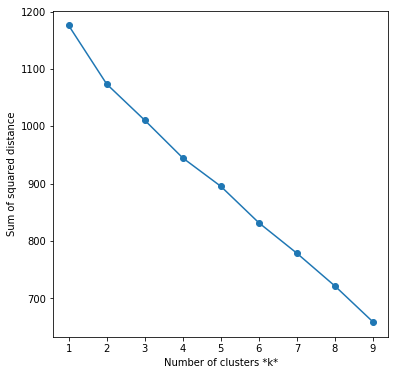

In [31]:
import matplotlib.pyplot as plt

mumbai_restaurants_one_hot_clustering = mumbai_restaurants_one_hot.drop(['id', 'name', 'categories', 'lat', 'lng'], axis=1)

# Standarize features
scaler = StandardScaler()
mumbai_restaurants_one_hot_clustering_std = scaler.fit_transform(mumbai_restaurants_one_hot_clustering)
mumbai_restaurants_one_hot_clustering_std
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(mumbai_restaurants_one_hot_clustering_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.show()

There is not a very "clear" elbow. But, 4 seems like a reasonable 'k' value.

In [32]:
# set number of clusters
kclusters = 4

mumbai_restaurants_one_hot_clustering = mumbai_restaurants_one_hot.drop(['id', 'name', 'categories', 'lat', 'lng'], axis=1)

# Standarize features
scaler = StandardScaler()
mumbai_restaurants_one_hot_clustering_std = scaler.fit_transform(mumbai_restaurants_one_hot_clustering)
mumbai_restaurants_one_hot_clustering_std

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_restaurants_one_hot_clustering_std)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 0, 2, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0], dtype=int32)

## Results and Discussion <a name="results"></a>

Create a new DataFrame with the Cluster labels

In [33]:
# add clustering labels
mumbai_restaurants.insert(0, 'Cluster Labels', kmeans.labels_)
mumbai_restaurants

,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
0,1,0,0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933,20.0,1.0,8.6
1,2,1,1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959,139.0,1.0,9.1
2,2,2,2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183,84.0,0.0,8.8
3,2,3,3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667,24.0,1.0,9.0
4,2,4,4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853,7.0,2.0,7.9
5,2,5,5,4c714f4fd7fab1f715d760c9,Cafe Excelsior,Café,18.937701,72.833566,20.0,1.0,7.8
6,2,6,6,4b0587d5f964a52078a322e3,Trishna,Seafood Restaurant,18.928619,72.832356,54.0,3.0,9.1
7,2,7,7,4b0587cef964a52081a222e3,Kyani & Co.,Café,18.944062,72.828576,98.0,1.0,8.4
8,2,8,8,4dc777edcc3ff3b304696c5a,Pratap Lunch Home,Seafood Restaurant,18.933605,72.832854,13.0,3.0,8.0
9,2,9,9,4ba9e19cf964a520ee3b3ae3,Natural's Ice Cream Parlour,Ice Cream Shop,18.934892,72.824222,22.0,1.0,8.9


Finally, let's visualize the resulting clusters

In [36]:
# create map
map_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_restaurants['lat'], mumbai_restaurants['lng'], mumbai_restaurants['name'], mumbai_restaurants['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 1 - Mainstream Restaurants

In [37]:
mumbai_restaurants.loc[mumbai_restaurants['Cluster Labels'] == 0]

,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
12,0,12,12,4c190902d4d9c928e755f029,Taste Of Kerala,Indian Restaurant,18.934205,72.833215,9.0,2.0,7.9
13,0,13,13,4bdac9bb2a3a0f47edf9abb6,Cannon Pav Bhaji,Food Truck,18.940780,72.836007,14.0,1.0,7.6
14,0,14,14,5215d00311d235bf4fe158e9,Dakshin Bar And Kitchen,Seafood Restaurant,18.936489,72.837490,2.0,3.0,7.6
17,0,17,17,52ee592a498e5dceaa6b6537,La Folie Patisserie,Dessert Shop,18.928504,72.832315,6.0,1.0,8.3
22,0,22,22,507926afe4b0801688753f43,The J,Fast Food Restaurant,18.930374,72.826734,9.0,1.0,8.3
23,0,23,23,4b0587d4f964a52071a322e3,Khyber Restaurant,Indian Restaurant,18.928134,72.831541,30.0,2.0,8.2
24,0,24,24,4b0587dbf964a5206ba422e3,Ayub's,Indian Restaurant,18.928383,72.832951,42.0,2.0,8.1
27,0,27,27,4bcad1c0b6c49c74ab2e9191,Balwas,Indian Restaurant,18.939548,72.828311,8.0,2.0,7.7
28,0,28,28,4b0587d6f964a520c0a322e3,Gaylord Restaurant,Indian Restaurant,18.932948,72.826127,44.0,2.0,8.0
29,0,29,29,4c024e8e0d0e0f479fed009a,"Badshah - Falooda, Ice Cream, Syrups",Ice Cream Shop,18.947303,72.833470,57.0,1.0,7.8


### Cluster 2 - Cheap Chinese Places

In [38]:
mumbai_restaurants.loc[mumbai_restaurants['Cluster Labels'] == 1]

,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
0,1,0,0,4caa0096d971b1f7ccca23e1,Royal China,Chinese Restaurant,18.938715,72.832933,20.0,1.0,8.6
19,1,19,19,50aa6378e4b0034097bc6c14,Golden Dragon,Chinese Restaurant,18.928479,72.832493,4.0,1.0,8.2


### Cluster 3 - Cafes

In [39]:
mumbai_restaurants.loc[mumbai_restaurants['Cluster Labels'] == 2]

,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
1,2,1,1,507fcb7a498e5d07b1604ea2,Starbucks,Coffee Shop,18.932190,72.833959,139.0,1.0,9.1
2,2,2,2,4d15a8e1816af04db4d444c2,Britannia & Co.,Parsi Restaurant,18.934683,72.840183,84.0,0.0,8.8
3,2,3,3,4cfe22077f2db1f745873bd4,Food for Thought,Café,18.932031,72.831667,24.0,1.0,9.0
4,2,4,4,4b0587d9f964a52023a422e3,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853,7.0,2.0,7.9
5,2,5,5,4c714f4fd7fab1f715d760c9,Cafe Excelsior,Café,18.937701,72.833566,20.0,1.0,7.8
6,2,6,6,4b0587d5f964a52078a322e3,Trishna,Seafood Restaurant,18.928619,72.832356,54.0,3.0,9.1
7,2,7,7,4b0587cef964a52081a222e3,Kyani & Co.,Café,18.944062,72.828576,98.0,1.0,8.4
8,2,8,8,4dc777edcc3ff3b304696c5a,Pratap Lunch Home,Seafood Restaurant,18.933605,72.832854,13.0,3.0,8.0
9,2,9,9,4ba9e19cf964a520ee3b3ae3,Natural's Ice Cream Parlour,Ice Cream Shop,18.934892,72.824222,22.0,1.0,8.9
10,2,10,10,4d691357342b8cfa3170c32c,K Rustoms. Ice Cream,Ice Cream Shop,18.933478,72.824995,64.0,1.0,8.8


### Cluster 4 - Premium Asian Restaurants

In [40]:
mumbai_restaurants.loc[mumbai_restaurants['Cluster Labels'] == 3]

,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
16,3,16,16,536752ce498e2b4b282cc871,Burma Burma,Asian Restaurant,18.929590,72.832043,21.0,2.0,8.2
31,3,31,31,4d31c8065c2db60cbb6ebb6c,The Table,New American Restaurant,18.924099,72.833097,48.0,4.0,8.5
36,3,36,36,4b41e0cff964a520b8c925e3,Wasabi by Morimoto,Japanese Restaurant,18.922012,72.833663,29.0,4.0,8.7
37,3,37,37,4b3504a2f964a520be2925e3,"The Oriental Blossom, Marine Plaza",Asian Restaurant,18.931605,72.823121,5.0,2.0,8.1
47,3,47,47,58b6d8957d0f6d1bd9e7edb8,Pa Pa Ya (Colaba),Asian Restaurant,18.921456,72.832337,3.0,2.0,8.2


## Example of Recommendation of Alternative Restaurant

Let us use Khyber Restaurant (4b0587d4f964a52071a322e3) as an example

In [42]:
khyber_row = mumbai_restaurants.loc[mumbai_restaurants['id'] == '4b0587d4f964a52071a322e3'].reset_index().loc[0]
khyber_cluster_label = khyber_row['Cluster Labels']
khyber_lat = khyber_row['lat']
khyber_lng = khyber_row['lng']

In [43]:
recommendations = mumbai_restaurants.loc[mumbai_restaurants['Cluster Labels'] == khyber_cluster_label].reset_index()
recommendations

,index,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating
0,12,0,12,12,4c190902d4d9c928e755f029,Taste Of Kerala,Indian Restaurant,18.934205,72.833215,9.0,2.0,7.9
1,13,0,13,13,4bdac9bb2a3a0f47edf9abb6,Cannon Pav Bhaji,Food Truck,18.940780,72.836007,14.0,1.0,7.6
2,14,0,14,14,5215d00311d235bf4fe158e9,Dakshin Bar And Kitchen,Seafood Restaurant,18.936489,72.837490,2.0,3.0,7.6
3,17,0,17,17,52ee592a498e5dceaa6b6537,La Folie Patisserie,Dessert Shop,18.928504,72.832315,6.0,1.0,8.3
4,22,0,22,22,507926afe4b0801688753f43,The J,Fast Food Restaurant,18.930374,72.826734,9.0,1.0,8.3
5,23,0,23,23,4b0587d4f964a52071a322e3,Khyber Restaurant,Indian Restaurant,18.928134,72.831541,30.0,2.0,8.2
6,24,0,24,24,4b0587dbf964a5206ba422e3,Ayub's,Indian Restaurant,18.928383,72.832951,42.0,2.0,8.1
7,27,0,27,27,4bcad1c0b6c49c74ab2e9191,Balwas,Indian Restaurant,18.939548,72.828311,8.0,2.0,7.7
8,28,0,28,28,4b0587d6f964a520c0a322e3,Gaylord Restaurant,Indian Restaurant,18.932948,72.826127,44.0,2.0,8.0
9,29,0,29,29,4c024e8e0d0e0f479fed009a,"Badshah - Falooda, Ice Cream, Syrups",Ice Cream Shop,18.947303,72.833470,57.0,1.0,7.8


## Present the recommendations sorted by distance away from Khyber

In [44]:
from geopy.distance import geodesic

# Add distance from Canoe to each recommendation
for i, row in recommendations.iterrows():
    distance = geodesic((khyber_lat, khyber_lng), (row.lat, row.lng)).km
    recommendations.at[i,'distance'] = distance
    
recommendations.sort_values(by=['distance'])

,index,Cluster Labels,Unnamed: 0,Unnamed: 0.1,id,name,categories,lat,lng,tipCount,priceTier,rating,distance
5,23,0,23,23,4b0587d4f964a52071a322e3,Khyber Restaurant,Indian Restaurant,18.928134,72.831541,30.0,2.0,8.2,0.000000
3,17,0,17,17,52ee592a498e5dceaa6b6537,La Folie Patisserie,Dessert Shop,18.928504,72.832315,6.0,1.0,8.3,0.091260
6,24,0,24,24,4b0587dbf964a5206ba422e3,Ayub's,Indian Restaurant,18.928383,72.832951,42.0,2.0,8.1,0.151055
19,44,0,44,44,5735f6df498eeb5eb79f56d2,1441 Pizzeria,Pizza Place,18.929081,72.834444,8.0,1.0,7.6,0.323307
18,43,0,43,43,5674388a498eff76add239fd,Rustico,Vegetarian / Vegan Restaurant,18.929541,72.834630,0.0,2.0,7.5,0.360799
21,46,0,46,46,4c2eebba452620a135bc1c0f,Cha Bar,Coffee Shop,18.929797,72.827468,8.0,1.0,7.7,0.466862
14,39,0,39,39,4bc1ccdff8219c74f1c6b310,Volga Paan Wala,Dessert Shop,18.932315,72.832497,4.0,1.0,7.5,0.473633
4,22,0,22,22,507926afe4b0801688753f43,The J,Fast Food Restaurant,18.930374,72.826734,9.0,1.0,8.3,0.563786
22,48,0,48,48,4b0587d6f964a520aea322e3,Souk,Mediterranean Restaurant,18.922434,72.833934,19.0,2.0,8.0,0.679409
0,12,0,12,12,4c190902d4d9c928e755f029,Taste Of Kerala,Indian Restaurant,18.934205,72.833215,9.0,2.0,7.9,0.694865


## Discussion

Cluster 2 (Cheap Chinese Places) and 4 (Premium Asian Restaurants) look like the restaurants are clustered together based on the categories and price tier. Cluster 1 and 3 look like they can use some more features to differentiate the restaurants within them. We can get a more accurate picture of how busy a restaurant is from the "visit counts" of the paid FourSquare account.

Some ideas of collecting more features include:

* get a more accurate picture of how busy a restaruant is from the "visit counts" of the paid FourSquare account.
* Use image recognization services to see what kinds of dishes people take photos of
* Use natural language processing to see what dishes the restaurants offer in the menu posted

The data set size is also smaller due to the limitation of the FourSquare free account. It can be solved by using the paid account. The process would be exactly the same.

## Conclusion <a name="conclusion"></a>

We can see that machine learning can help with finding things that are "similar" to each other. It can help to make smarter recommendations that humans can't since we can base the recommendations on a large amount of data and features. We have demonstrated an algorithm that can help map or restaurant booking applications to provide strategically calculated recommendations of alternative restaurants.